In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

%matplotlib inline

In [6]:
import nltk
nltk.download('punkt')
from nltk.corpus import gutenberg
nltk.download('gutenberg')
import re
from sklearn.model_selection import train_test_split

#reading in the data, this time in the form of paragraphs
emma=gutenberg.paras('austen-emma.txt')
emma_paras=[]
for paragraph in emma:
    para=paragraph[0]
    #removing the double-dash from all words
    para=[re.sub(r'--','',word) for word in para]
    #Forming each paragraph into a string and adding it to the list of strings.
    emma_paras.append(' '.join(para))

print(emma_paras[0:4])

[nltk_data] Downloading package punkt to C:\Users\Carter
[nltk_data]     Carlson\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to C:\Users\Carter
[nltk_data]     Carlson\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
['[ Emma by Jane Austen 1816 ]', 'VOLUME I', 'CHAPTER I', 'Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her .']


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(emma_paras, test_size=0.4,random_state=42)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than 1/2 the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english',
                             lowercase=True, # convert to lowercase
                             use_idf=True, # use inverse document frequencies in our weighting
                             smooth_idf=True) # prevents divide-by-zero errors
                            
emma_paras_tfidf = vectorizer.fit_transform(emma_paras)
print('Number of features: %d' % emma_paras_tfidf.get_shape()[1])

X_train_tfidf, X_test_tfidf = train_test_split(emma_paras_tfidf, test_size=0.4, random_state=42)

# reshape vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()


Number of features: 1948


Percent variance captured by all components: 61.966177849248005


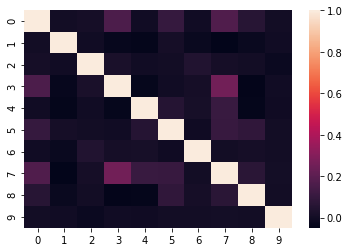

In [18]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd = TruncatedSVD(200) # reduce # of features to 200
lsa = make_pipeline(svd, Normalizer(copy=False))
#X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_test_lsa = lsa.fit_transform(X_test_tfidf)


variance_explained = svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print('Percent variance captured by all components:', total_variance*100)

similarity = np.asarray(np.asmatrix(X_test_lsa) * np.asmatrix(X_test_lsa).T)
sim_matrix=pd.DataFrame(similarity,index=X_test).iloc[0:10,0:10]

ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()